In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 22.6 MB 22.2 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 12.0 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357350 sha256=24dc700a7d452561764abffaad19f8fd4b49710ba468978ec4a6d7ebbfd13226
  Stored in directory: /tmp/pip-ephem-wheel-cache-nv08tpnk/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=c6406bea8a886113dca37d8ac0b53c644199ce7623dcfd20aee023503d3265c2
  Stored in directory: /root/.

In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Mounted at /content/gdrive
/content


In [2]:
#Importamos las librerias

# Operaciones Basicas
import numpy as np
import pandas as pd
import pandas_profiling

# Visualizacion de Datos
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-2-77c9262dd059>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [3]:
url = "https://raw.githubusercontent.com/thedamned19/Curso-Data-Science/main/heart_2020_cleaned.csv"

In [4]:
base = pd.read_csv(url)

In [5]:
base.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [6]:
base.tail()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No    Male        35-39  Hispanic       No   
319792           0.0          No  Female        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
319790               No       Fair        6.0    Yes            No         No  
319791              Yes  Very good        5.0    Yes            No         No  
319792              Yes       Good        6.0     No            No         No  
319793               No       Good       12.0     No            No         No  
319794              Yes       Good        8.0     No            No         No

In [7]:
# Transformación de variables a numéricos.
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [8]:
ataques = base["HeartDisease"]
print (ataques)

0          No
1          No
2          No
3          No
4          No
         ... 
319790    Yes
319791     No
319792     No
319793     No
319794     No
Name: HeartDisease, Length: 319795, dtype: object


In [9]:
values = array(ataques)
print(values)

['No' 'No' 'No' ... 'No' 'No' 'No']


In [10]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

[0 0 0 ... 0 0 0]


In [11]:
# Asignamos a la variable la transformación realizada a numérico.
base["HeartDisease"] = integer_encoded
print(base["HeartDisease"])

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int64


In [12]:
# cargar los datos iniciales en una variable.
inverted = label_encoder.inverse_transform(base["HeartDisease"])
print(inverted)

['No' 'No' 'No' ... 'No' 'No' 'No']


In [13]:
# Asignamos al resto de las variables valores numéricos.
fumador = base["Smoking"]
values = array(ataques)
integer_encoded = label_encoder.fit_transform(values)
base["Smoking"] = integer_encoded

In [14]:
alcholico = base["AlcoholDrinking"]
values = array(alcholico)
integer_encoded = label_encoder.fit_transform(values)
base["AlcoholDrinking"] = integer_encoded

In [15]:
derrame_cerebral = base["Stroke"]
values = array(derrame_cerebral)
integer_encoded = label_encoder.fit_transform(values)
base["Stroke"] = integer_encoded

In [16]:
dificultad_caminar = base["DiffWalking"]
values = array(dificultad_caminar)
integer_encoded = label_encoder.fit_transform(values)
base["DiffWalking"] = integer_encoded

In [17]:
genero = base["Sex"]
values = array(genero)
integer_encoded = label_encoder.fit_transform(values)
base["Sex"] = integer_encoded

In [18]:
rango_edad = base["AgeCategory"]
values = array(rango_edad)
integer_encoded = label_encoder.fit_transform(values)
base["AgeCategory"] = integer_encoded

In [19]:
raza = base["Race"]
values = array(raza)
integer_encoded = label_encoder.fit_transform(values)
base["Race"] = integer_encoded

In [20]:
diabetico = base["Diabetic"]
values = array(diabetico)
integer_encoded = label_encoder.fit_transform(values)
base["Diabetic"] = integer_encoded

In [21]:
actividad_fisica = base["PhysicalActivity"]
values = array(actividad_fisica)
integer_encoded = label_encoder.fit_transform(values)
base["PhysicalActivity"] = integer_encoded

In [22]:
salud = base["GenHealth"]
values = array(salud)
integer_encoded = label_encoder.fit_transform(values)
base["GenHealth"] = integer_encoded

In [23]:
asmatico = base["Asthma"]
values = array(asmatico)
integer_encoded = label_encoder.fit_transform(values)
base["Asthma"] = integer_encoded

In [24]:
nefropatia = base["KidneyDisease"]
values = array(nefropatia)
integer_encoded = label_encoder.fit_transform(values)
base["KidneyDisease"] = integer_encoded

In [25]:
cancer_piel = base["SkinCancer"]
values = array(cancer_piel)
integer_encoded = label_encoder.fit_transform(values)
base["SkinCancer"] = integer_encoded

In [26]:
base.head()

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        0                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        0                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          30.0            0    0            7     5         2   
1           0.0            0    0           12     5         0   
2          30.0            0    1            9     5         2   
3           0.0            0    0           11     5         0   
4           0.0            1    0            4     5         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          4        5.0       1              0           1  
1                 1          4        7.0       0              0           0  
2                 1          1        8.0       1              0           0  
3                 0          2        6.0       0              0           1  
4                 1          4        8.0       0              0           0

In [27]:
base.shape

(319795, 18)

In [28]:
#Totalidad de registros por columnas
base.count()

HeartDisease        319795
BMI                 319795
Smoking             319795
AlcoholDrinking     319795
Stroke              319795
PhysicalHealth      319795
MentalHealth        319795
DiffWalking         319795
Sex                 319795
AgeCategory         319795
Race                319795
Diabetic            319795
PhysicalActivity    319795
GenHealth           319795
SleepTime           319795
Asthma              319795
KidneyDisease       319795
SkinCancer          319795
dtype: int64

In [29]:
#Tipo de dato de cada columna
base.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Race                  int64
Diabetic              int64
PhysicalActivity      int64
GenHealth             int64
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

In [30]:
#Tipo de estructura del dataset
type(base)

pandas.core.frame.DataFrame

In [31]:
#Principales medidas estadisticas
base.describe().T

count       mean       std    min    25%    50%    75%  \
HeartDisease      319795.0   0.085595  0.279766   0.00   0.00   0.00   0.00   
BMI               319795.0  28.325399  6.356100  12.02  24.03  27.34  31.42   
Smoking           319795.0   0.085595  0.279766   0.00   0.00   0.00   0.00   
AlcoholDrinking   319795.0   0.068097  0.251912   0.00   0.00   0.00   0.00   
Stroke            319795.0   0.037740  0.190567   0.00   0.00   0.00   0.00   
PhysicalHealth    319795.0   3.371710  7.950850   0.00   0.00   0.00   2.00   
MentalHealth      319795.0   3.898366  7.955235   0.00   0.00   0.00   3.00   
DiffWalking       319795.0   0.138870  0.345812   0.00   0.00   0.00   0.00   
Sex               319795.0   0.475273  0.499389   0.00   0.00   0.00   1.00   
AgeCategory       319795.0   6.514536  3.564759   0.00   4.00   7.00   9.00   
Race              319795.0   4.396742  1.212208   0.00   5.00   5.00   5.00   
Diabetic          319795.0   0.300386  0.716480   0.00   0.00   0.00   0.00   
PhysicalActivity  319795.0   0.775362  0.417344   0.00   1.00   1.00   1.00   
GenHealth         319795.0   2.220904  1.534647   0.00   1.00   2.00   4.00   
SleepTime         319795.0   7.097075  1.436007   1.00   6.00   7.00   8.00   
Asthma            319795.0   0.134061  0.340718   0.00   0.00   0.00   0.00   
KidneyDisease     319795.0   0.036833  0.188352   0.00   0.00   0.00   0.00   
SkinCancer        319795.0   0.093244  0.290775   0.00   0.00   0.00   0.00   

                    max  
HeartDisease       1.00  
BMI               94.85  
Smoking            1.00  
AlcoholDrinking    1.00  
Stroke             1.00  
PhysicalHealth    30.00  
MentalHealth      30.00  
DiffWalking        1.00  
Sex                1.00  
AgeCategory       12.00  
Race               5.00  
Diabetic           3.00  
PhysicalActivity   1.00  
GenHealth          4.00  
SleepTime         24.00  
Asthma             1.00  
KidneyDisease      1.00  
SkinCancer         1.00

In [32]:
#Data Profiling
profile = pandas_profiling.ProfileReport(base)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

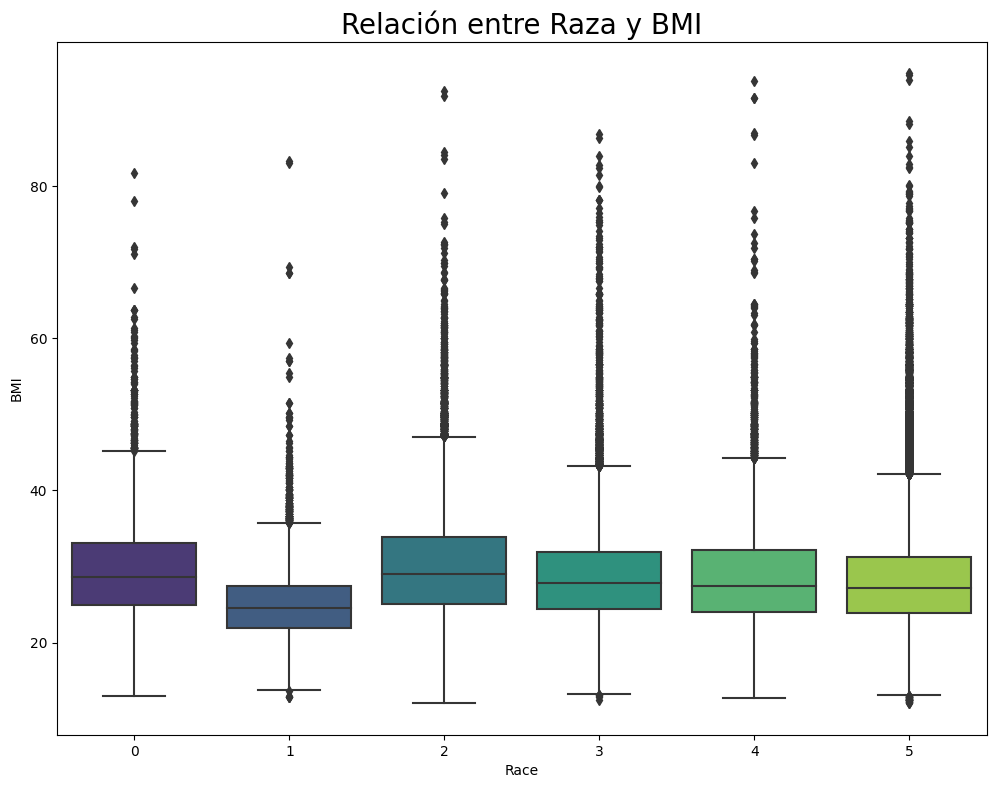

In [ ]:
# Relación BMI vs Race
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(x=base.Race, y=base.BMI, palette = 'viridis')
plt.title('Relación entre Raza y BMI', fontsize = 20)
plt.show()

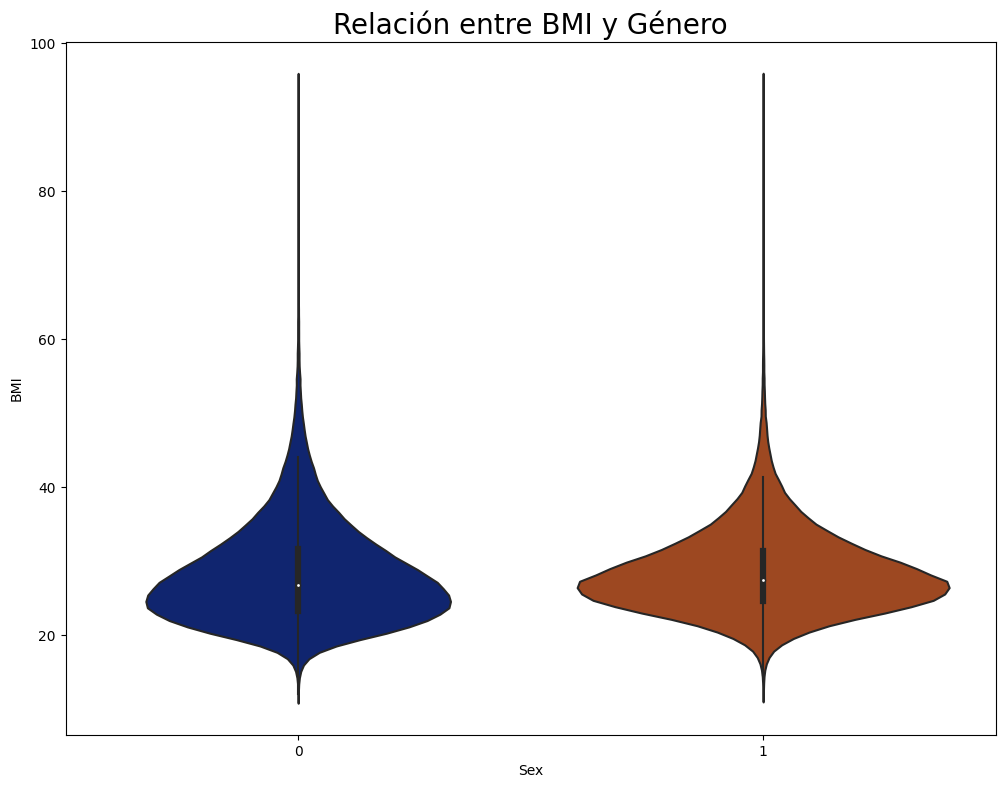

In [ ]:

plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(x=base['Sex'], y=base['BMI'], palette = 'dark')
plt.title('Relación entre BMI y Género', fontsize = 20, fontweight = 30)
plt.show()

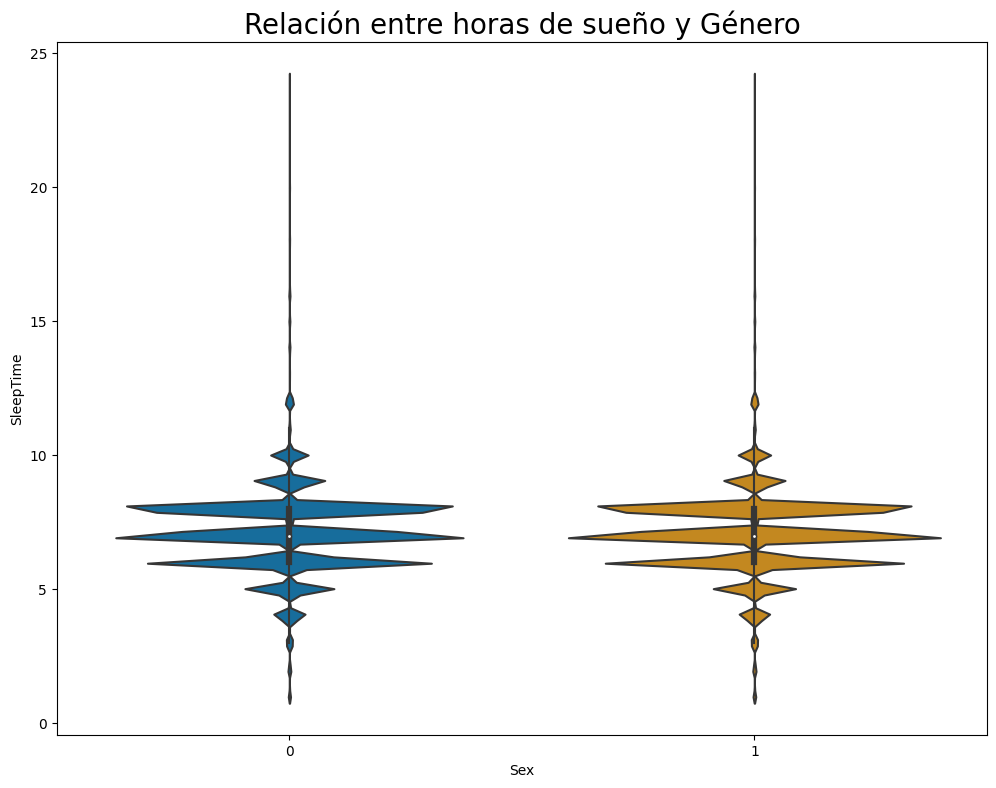

In [ ]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(x=base['Sex'], y=base['SleepTime'], palette = 'colorblind')
plt.title('Relación entre horas de sueño y Género', fontsize = 20, fontweight = 30)
plt.show()

In [34]:
Raza = base['Race']
Raza

0         5
1         5
2         5
3         5
4         5
         ..
319790    3
319791    3
319792    3
319793    3
319794    3
Name: Race, Length: 319795, dtype: int64

In [35]:
Cancer_Piel = base['SkinCancer']
Cancer_Piel
# 1 - SI
# 0 - NO

0         1
1         0
2         0
3         1
4         0
         ..
319790    0
319791    0
319792    0
319793    0
319794    0
Name: SkinCancer, Length: 319795, dtype: int64

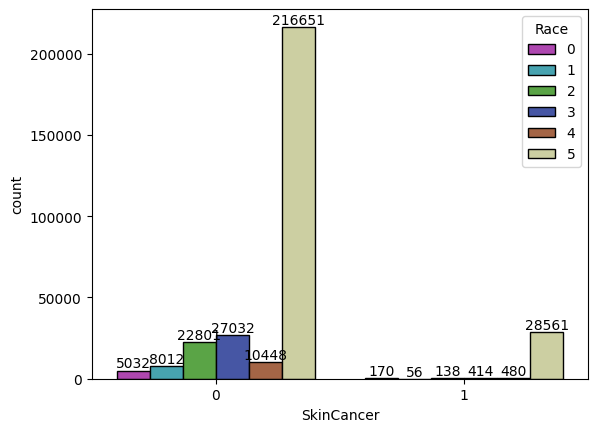

In [36]:
# Los siguientes gráficos (Count plot) fueron realizados para entregas anteriores,
# los incluyo porque relacionan variables que es parte de lo pedido para esta entrega.
# Count plot
ax = sns.countplot(x = Cancer_Piel, hue = Raza, edgecolor = "black", saturation = 0.5, palette=['#E113E4',"#13CBE4", "#3FD317", "#1736D3", "#D35517", "#DFE58C"])
for label in ax.containers:
    ax.bar_label(label)

In [37]:
Genero = base['Sex']
Genero
# 0 - Mujer
# 1 - Hombre

0         0
1         0
2         1
3         0
4         0
         ..
319790    1
319791    1
319792    0
319793    0
319794    0
Name: Sex, Length: 319795, dtype: int64

In [38]:
Diabetes = base['Diabetic'].unique()
Diabetes

array([2, 0, 1, 3])

In [39]:
Diabetes = base['Diabetic']
Diabetes
# 0 - NO
# 2 - SI

0         2
1         0
2         2
3         0
4         0
         ..
319790    2
319791    0
319792    0
319793    0
319794    0
Name: Diabetic, Length: 319795, dtype: int64

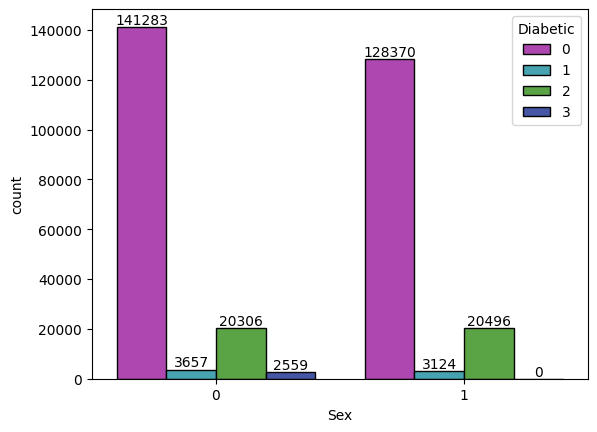

In [40]:
# Count plot
ax = sns.countplot(x = Genero, hue = Diabetes, edgecolor = "black", saturation = 0.5, palette=['#E113E4',"#13CBE4", "#3FD317", "#1736D3"])
for label in ax.containers:
    ax.bar_label(label)

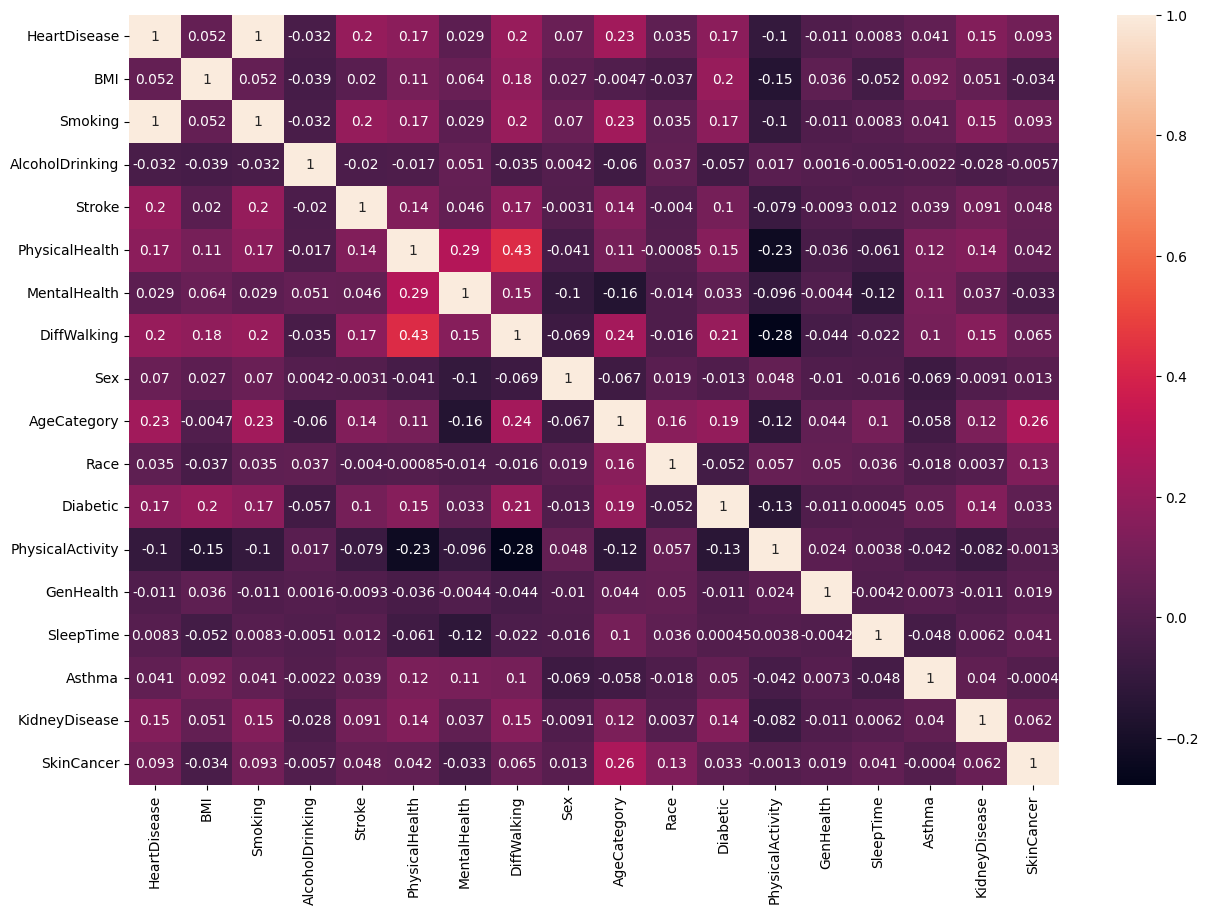

In [ ]:
#Correlaciones
plt.figure(figsize=(15, 10))

base_corr = base.corr()
sns.heatmap(base_corr,
            xticklabels = base_corr.columns.values,
            yticklabels = base_corr.columns.values,
            annot = True);



---



**Insights obtenidos.**

La tabla que me devuelve el describe().T del Dataset me permite saber que variables son numéricas y cuales son categóricas.
Si tomo cada variable por separado lo que estoy realizando es un análisis univariado y para cada variable categórica puedo decir que no tienen sentido los percentiles ya que los valores son 1 y 0.

Habiendo sido aplicado Data Profiling al Dataset elejido para este proyecto (heart_2020_cleaned.csv) podemos obtener los siguientes insights:

* La variable que expresa enfermedad cardíaca (HeartDisease) está altamente correlacionada en general con el tabaquismo (Smoking), por lo tanto podemos afirmar que HeartDisease es dependiente de Smoking.

Observando el mapa de calor (heatmap) además de ver la relación mencionada anteriormente, también podemos obtener la relación que existe (en menor medida) entre las siguientes variables:

    1) Dificultad para caminar (DiffWalking) - Estado físico (PhysicalHealth).
    2) Salud mental (MentalHealth) - Estado físico (PhysicalHealth).
    3) Dificultad para caminar (DiffWalking) - Edad (AgeCategory).
    4) Dificultad para caminar (DiffWalking) - Diabetes (Diabetic).
    5) Cancer de piel (SkinCancer) - Edad (AgeCategory).





Observando la gráfica que relaciona la raza de las personas con BMI (Indice de masa corporal) podemos decir que:

    1) Las razas 0 y 2 tienen un valor mas alto de BMI que las otras.
    2) Los datos de la raza 2 se encuentran mas dispersos que el resto.
    3) Los valores de la raza 1 están por debajo de las demás razas.
    4) La raza 5 tiene mas outliers que las otras.

Según lo que se puede ver en los gráficos que relacionan BMI-Género y Horas de sueño-Género podemos concluir que no hay diferencias en estas dos variables si tomamos en cuenta el sexo de las personas.

En el gráfico que relaciona Cáncer de piel-Raza, a simple vista no parece ser que hubiera mayor cantidad de personas con cáncer a la piel para un tipo de raza por sobre el resto.

En el gráfico que relaciona Diabetes-Género queda claro que la relación diabeticos si o no es igual tanto para hombres y mujeres.

Pudimos comprobar que existen variables que no se distribuyen normalmente las cuales habrá que modificar, seguramente realice raíz cuadrada para que las
distribuciones estén mas cerca a la normalidad.
Las variables son HeartDisease, Smoking, AlcoholDrinking, Stroke, Diabetic,
KidneyDisease, SkinCancer siendo todas ellas categóricas.
